# hERG channel

Write about the hERG channel https://en.wikipedia.org/wiki/HERG

In [1]:
import utils
import matplotlib.pyplot as plt

In [2]:
utils.list_ode_models()

['tentusscher_noble_noble_panfilov_2006_c.ode',
 'basemodel.ode',
 'tentusscher_2004_mcell_updated.ode',
 'paci_hyttinen_aaltosetala_severi_ventricularVersion.ode']

In [8]:
model_name = "basemodel"

In [9]:
model = utils.load_model(model_name)

Loaded ODE model 'basemodel' with:
     Num full states: 25
      Num parameters: 86


In [10]:
dt = 1.0
t_start = 0.0
t_end = 1000.0

In [11]:
t, u = model.solve(t_start=t_start, t_end=t_end, dt=dt)

In [21]:
model.monitor_names()

['mss',
 'taum',
 'aj',
 'bj',
 'tauj',
 'jss',
 'I_Na',
 'sigma',
 'fNaK',
 'I_NaK',
 'eks',
 'xsss',
 'tauxs',
 'I_Ks',
 'I_KATP',
 'Xr1_inf',
 'alpha_Xr1',
 'beta_Xr1',
 'tau_Xr1',
 'Xr2_infinity',
 'alpha_Xr2',
 'beta_Xr2',
 'tau_Xr2',
 'I_Kr',
 'aK1',
 'bK1',
 'K1ss',
 'I_K1',
 'I_bCl',
 'fss',
 'dss',
 'taud',
 'tauf',
 'ibarca_j',
 'I_CaL',
 'Ka_sl',
 's1_sl',
 's2_sl',
 's3_sl',
 'I_NaCa',
 'I_pCa',
 'I_bCa',
 'xf_inf',
 'tau_xf',
 'I_f',
 'p',
 'J_RyR_active',
 'J_leak',
 'J_RyR',
 'J_c_b',
 'J_d_b',
 'J_s_b',
 'J_sl_b',
 'J_CaL',
 'J_pCa',
 'J_bCa',
 'J_NaCa',
 'J_e_sl',
 'Q10SERCA',
 'J_SERCA',
 'J_n_s',
 'J_sl_c',
 'J_d_c',
 'i_Stim',
 'I_tot',
 'mLss',
 'tm',
 'tmL',
 'hLss',
 'GNaL',
 'I_NaL',
 'q_inf',
 'tau_q',
 'r_inf',
 'tau_r',
 'I_to',
 'I_Na_tot',
 'J_Na',
 'FoRT',
 'ena',
 'ek',
 'eca_sl',
 'ecl',
 'Qpow',
 'dm_dt',
 'dj_dt',
 'dmL_dt',
 'dhL_dt',
 'dXr1_dt',
 'dXr2_dt',
 'dx_Ks_dt',
 'dq_dt',
 'dr_dt',
 'dd_dt',
 'df_dt',
 'df_Ca_B_dt',
 'dxf_dt',
 'dr_RyR_dt',
 

In [16]:
V_index = model.state_index("V_m")
print(V_index)

23


In [17]:
V = u[:, V_index]

<IPython.core.display.Javascript object>


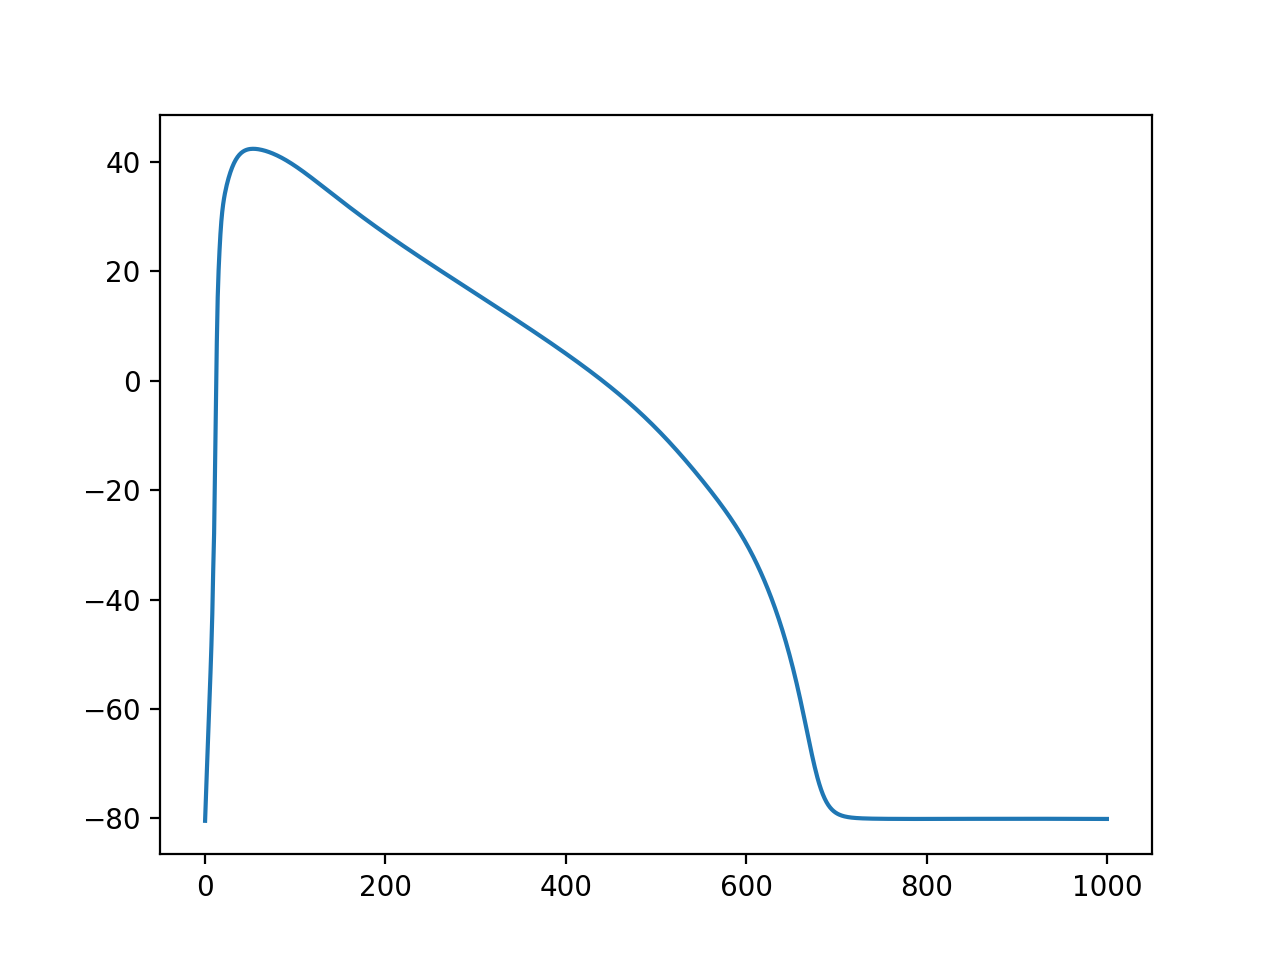

In [18]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, V)
plt.show()

In [27]:
# List all monitor names
# model.monitor_names()
parameters = model.default_parameters()
i_Kr = model.monitor_single("I_Kr", u, t)

<IPython.core.display.Javascript object>


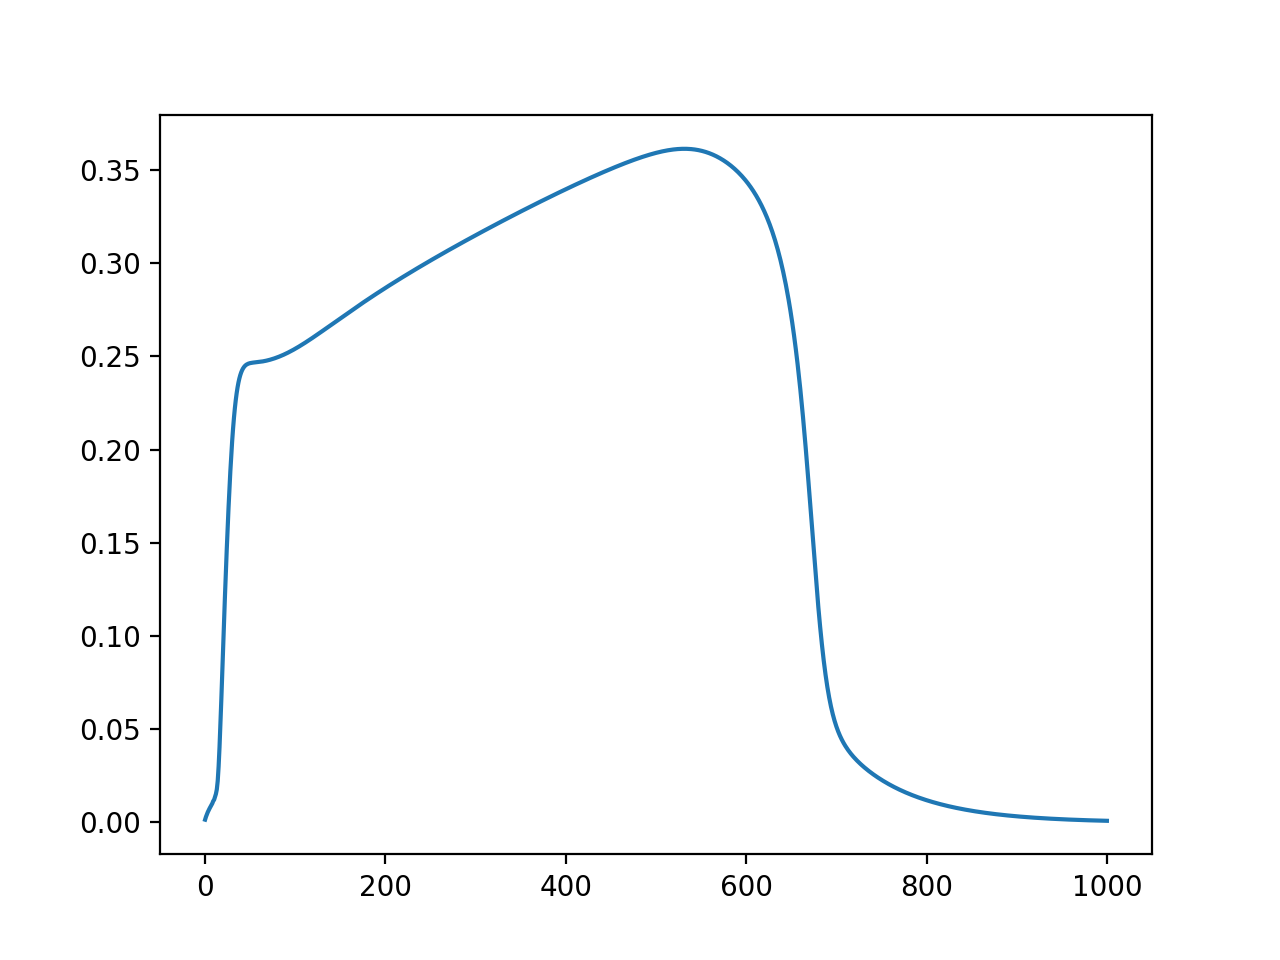

In [28]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, i_Kr)
plt.show()

In [12]:
parameters = model.default_parameters()
parameters["g_Kr"] *= 0.2
t2, u2 = model.solve(t_start=t_start, t_end=t_end, dt=dt, parameters=parameters)

Update paramameter g_Kr from 0.096 to 0.019200000000000002


In [13]:
V_kr_block = u2[:, V_index]

<IPython.core.display.Javascript object>


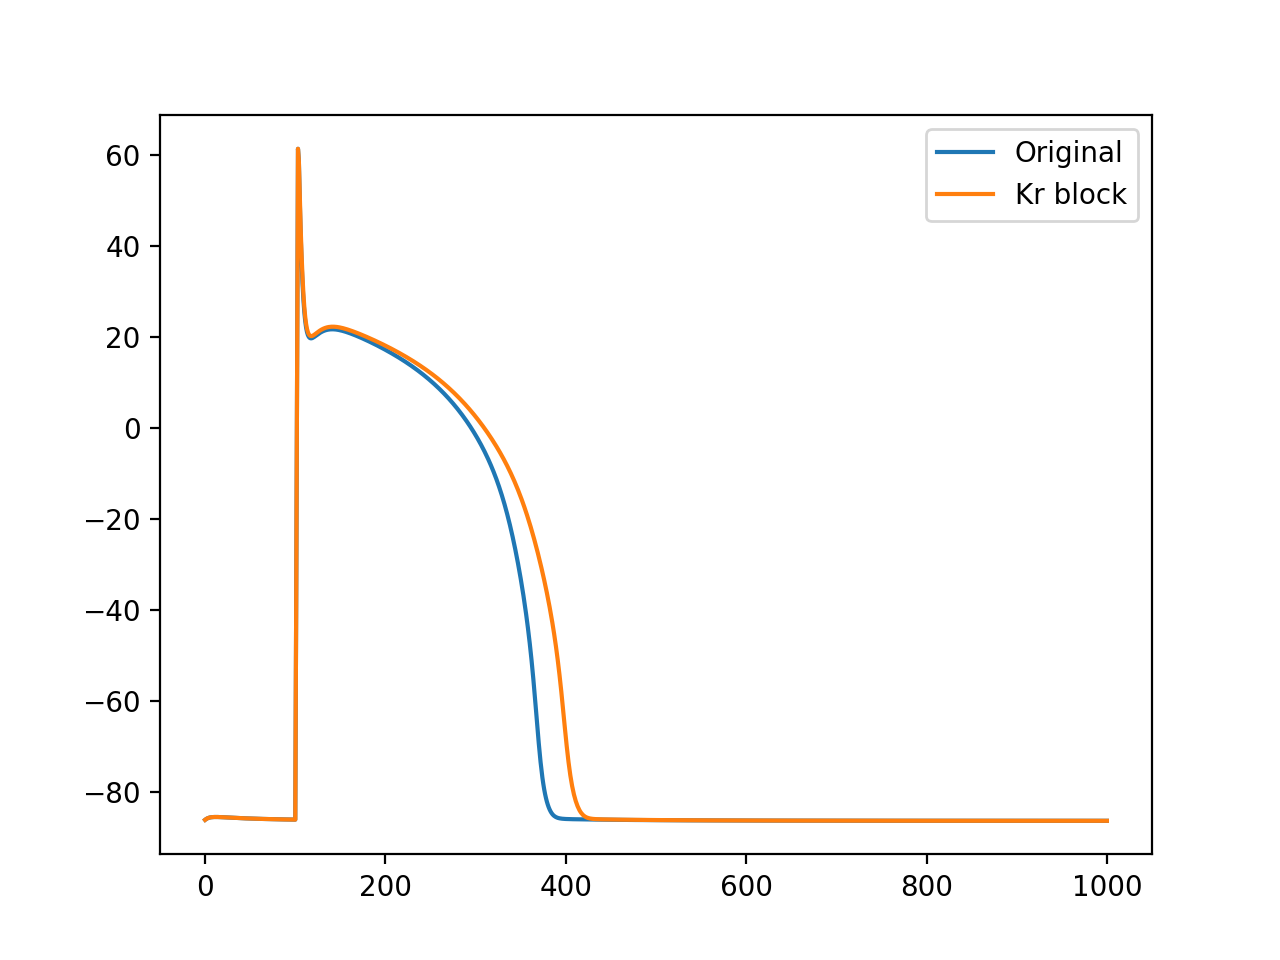

In [14]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, V, label="Original")
ax.plot(t2, V_kr_block, label="Kr block")
ax.legend(loc="best")
plt.show()

In [15]:
i_Kr_block = model.monitor_single("i_Kr", u, t, parameters=parameters)

<IPython.core.display.Javascript object>


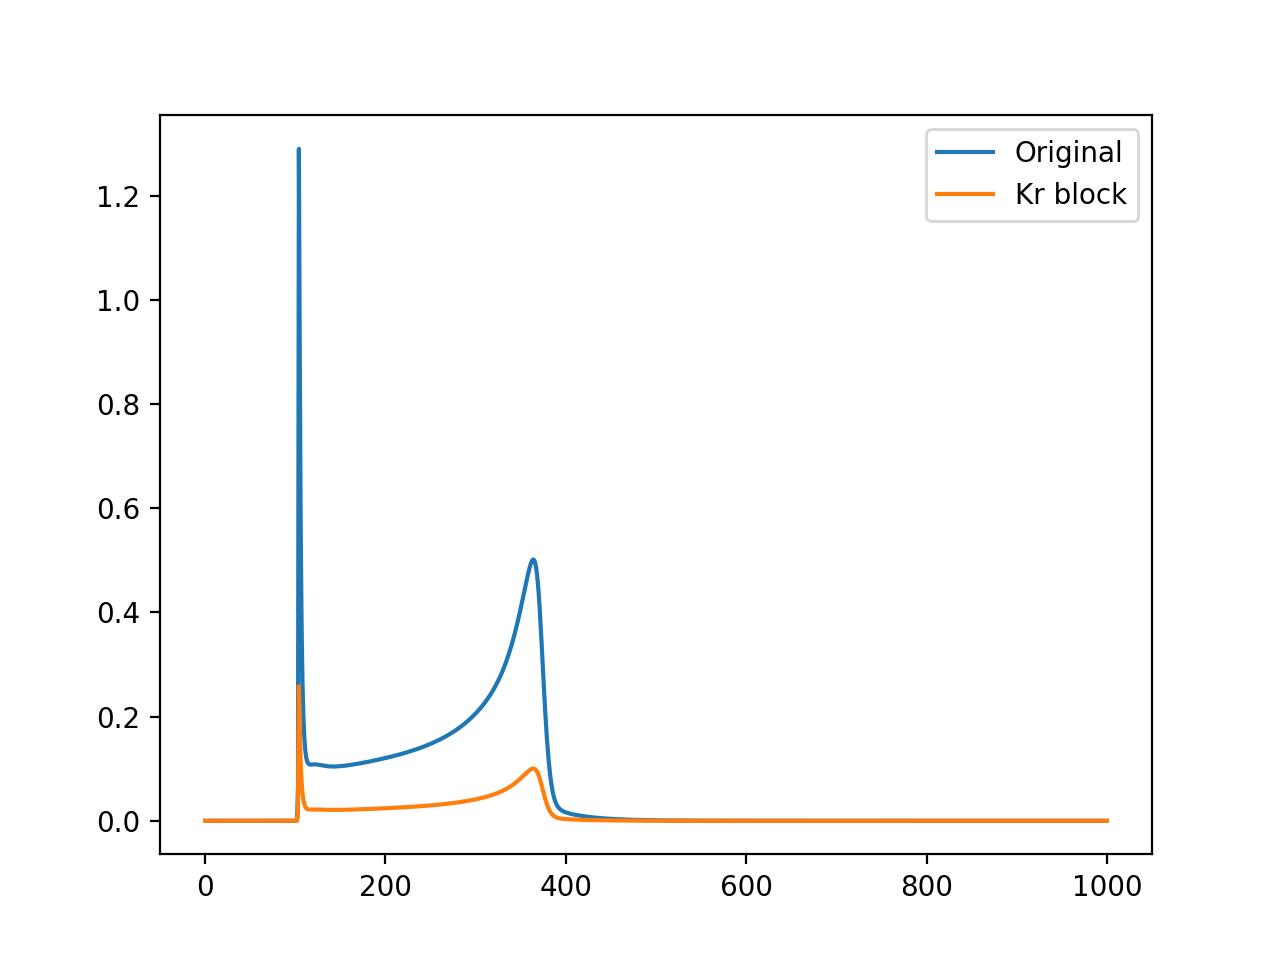

In [16]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(t, i_Kr, label="Original")
ax.plot(t2, i_Kr_block, label="Kr block")
ax.legend(loc="best")
plt.show()

In [17]:
import ipywidgets as widgets

<IPython.core.display.Javascript object>


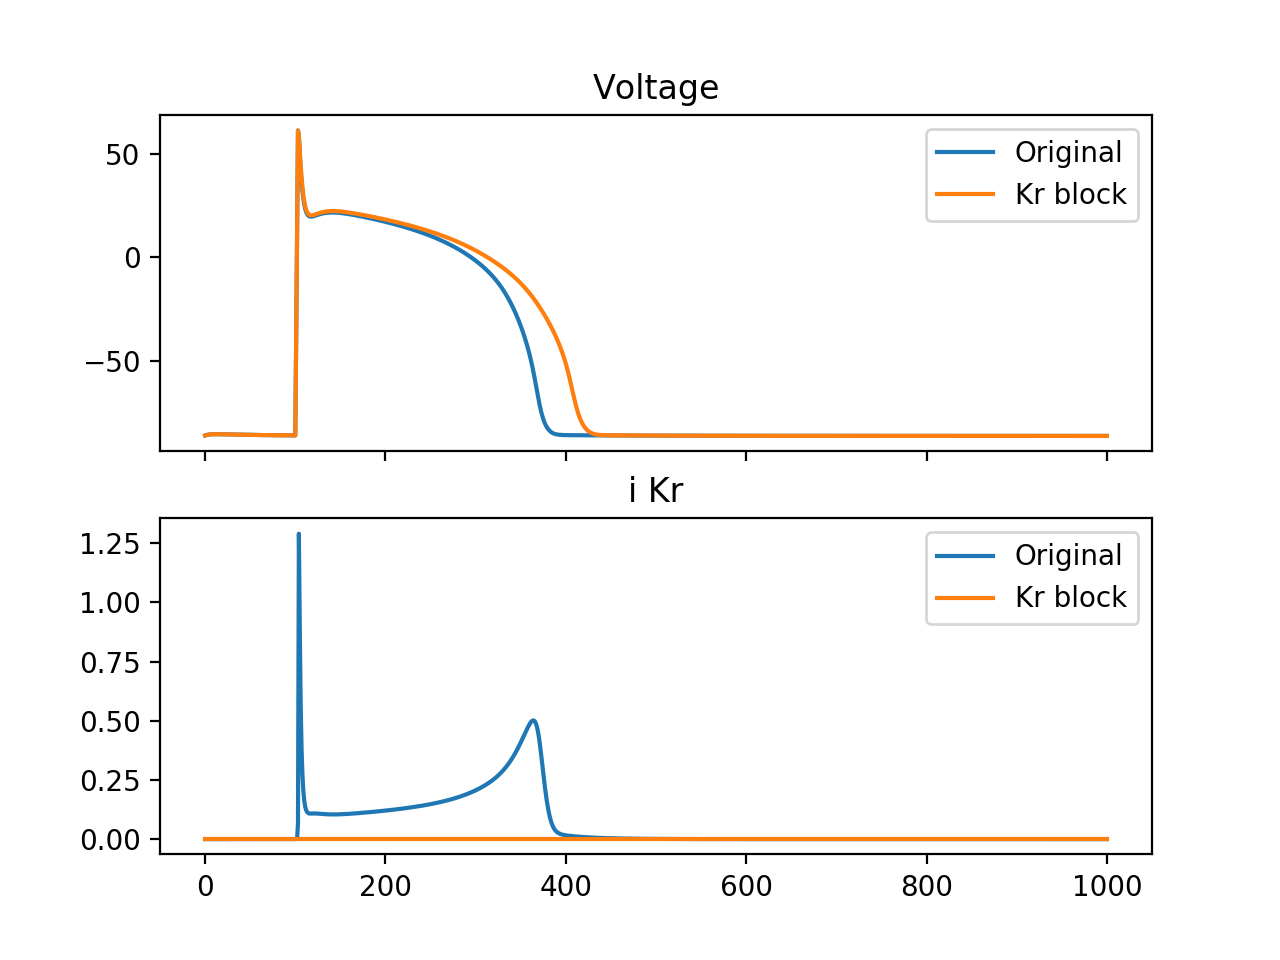

interactive(children=(FloatSlider(value=0.0, description='block', max=1.0, min=-1.0), Output()), _dom_classes=…

In [18]:
%matplotlib notebook
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, V, label="Original")
line_V, = ax[0].plot(t, V, label="Kr block")
ax[0].legend(loc="best")
ax[0].set_title("Voltage")
ax[1].plot(t, i_Kr, label="Original")
line_iKr, = ax[1].plot(t, i_Kr, label="Kr block")
ax[1].legend(loc="best")
ax[1].set_title("i Kr")
plt.show()

@widgets.interact(block=(-1, 1, 0.1))
def Kr_block(block):
    parameters = model.default_parameters().copy()
    parameters["g_Kr"] *= (1 + block)
    t2, u2 = model.solve(t_start=t_start, t_end=t_end, dt=dt, parameters=parameters)
    i_Kr_block = model.monitor_single("i_Kr", u2, t2, parameters=parameters)
    V_kr_block = u2[:, V_index]
    line_V.set_ydata(V_kr_block)
    line_iKr.set_ydata(i_Kr_block)
    fig.canvas.draw_idle()
 